In [169]:
import numpy as np
import pandas as pd
import scipy.signal as sig
import scipy.optimize as opt
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rc('xtick', direction='out', top=True)
mpl.rc('ytick', direction='out', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.xmargin'] = 0

In [122]:
files = ["11-26.xls", #0
        "calibration data with limits.xls", #1
        "driven resonance attempt 1.xls", #2
        "driven1.xls", #3
        "free decay attempt 1.xls", #4
        "Friday extremum to other extremum static method.xls", #5
        "neutral to extremum.xls", #6
        "other mode free decay.xls", #7 good free decay
        "static method 11-19.xls", #8 linear correctible?
        "static method 11-21.xls", #9
        "static method full 11-19.xls", #10 linear correctable?
        "static method low noise 11-24.xls", #11 quadratic?
        ]

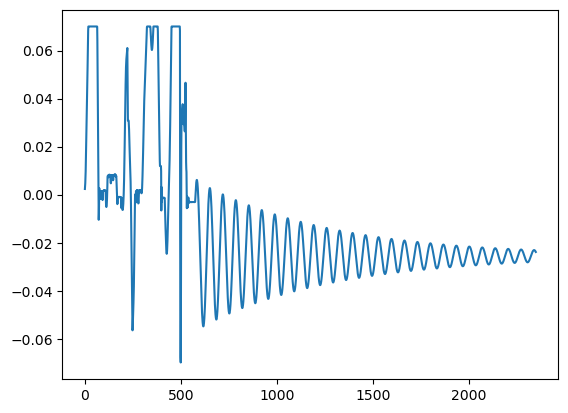

In [124]:
file = 7

t, z = (pd.read_excel(files[file]).to_numpy() * np.array([1, 1e-3])).T
plt.plot(t, z)

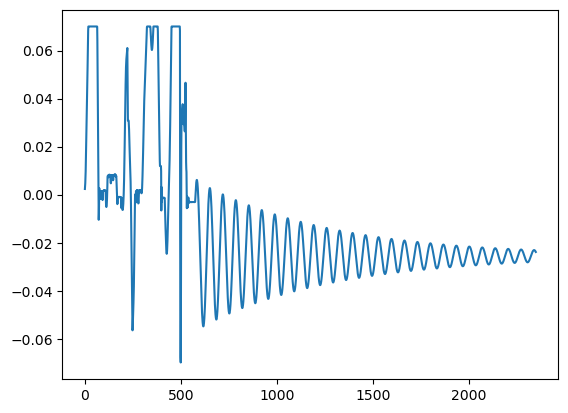

In [126]:
prom = 0.00001

plt.plot(t, z)

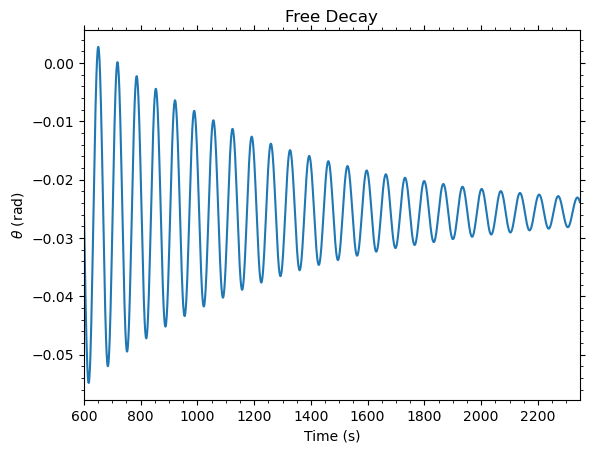

In [171]:
L = 600
ts = t[L:]
zs = z[L:]
pk_ind, _ = sig.find_peaks(zs, prominence = prom)
antipk_ind, _ = sig.find_peaks(-zs, prominence = prom)
#plt.scatter(ts[pk_ind], zs[pk_ind])
#plt.scatter(ts[antipk_ind], zs[antipk_ind])
plt.plot(ts, zs)
plt.title("Free Decay")
plt.xlabel("Time (s)")
plt.ylabel(r"$\theta$ (rad)")
plt.savefig("decay.png")

In [128]:
delts = ts[pk_ind]-ts[antipk_ind]
std = 2 * np.std(delts) / np.sqrt(len(delts))
std

0.16525727862448453

In [130]:
T = 2 * np.mean(delts)
T

67.53846153846153

In [134]:
zs[pk_ind[0]]

0.002730553150177002

In [136]:
zs[antipk_ind[-1]]

-0.028153069257736207

In [140]:
x0 = 1 - (zs[pk_ind[0]] - zs[pk_ind[-1]]) / (np.sum(zs[pk_ind[:-1]]) - np.sum(zs[antipk_ind[1:]]))
x1 = 1 - (zs[antipk_ind[0]] - zs[antipk_ind[-1]]) / (np.sum(zs[antipk_ind[:-1]]) - np.sum(zs[pk_ind[:-2]]))

In [145]:
x = (x0 + x1) / 2
x

0.9531961712698489

In [147]:
b = (-2 * np.log(x)) / T
b # 1/b = 574 s

0.001419474159937905

In [149]:
I = 1.471822412e-4 # worked out on my calculator

In [151]:
K = (4 * np.pi ** 2 / T ** 2 + b ** 2) * I
K

1.2741305140287286e-06